/Users/satoshan/Library/CloudStorage/Box-Box/scan_org_charts/2010/image00101.jpg


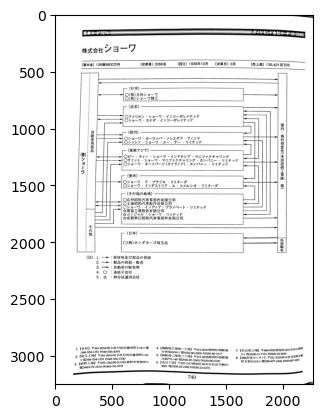

In [41]:
import cv2 as cv2
import os
import matplotlib.pyplot as plt
import easyocr
import pyocr
import numpy as np
from PIL import ImageFont, ImageDraw, Image
import sys
path = "/Users/satoshan/Library/CloudStorage/Box-Box/scan_org_charts/"
path_2010 = path + "2010"

# Choose 2010 of "三井造船"
files = os.listdir(path_2010)
files = [f for f in files if os.path.isfile(os.path.join(path_2010, f))]
files.sort()

for i in range(len(files)):
    file = os.path.join(path_2010, files[i])
    img = cv2.imread(file)
    plt.imshow(img)
    plt.show()

    # cutting header
    header_size = 450
    cropped_image = img[header_size:, :]

    # cutting footer
    # make figure biniary
    gray_image = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2GRAY)
    gray_image_inv = cv2.bitwise_not(gray_image)

    # footer detection
    row_sums = np.sum(gray_image_inv, axis=1) 
    threshold = 100
    empty_row_threshold = 30

    empty_row_count = 0
    footer_start = None
    for i, row_sum in enumerate(row_sums):
        if row_sum < threshold:
            empty_row_count += 1
        else:
            empty_row_count = 0
        if empty_row_count >= empty_row_threshold:
            footer_start = i - empty_row_threshold + 1
            break

    if footer_start is not None:
        final_image = cropped_image[:footer_start, :]
    else:
        final_image = cropped_image

    print(footer_start)
    plt.imshow(final_image)
    plt.show()